In [9]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 


# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 6))
mpl.rc('image', cmap='gray')
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble=r'\usepackage{siunitx}')

mpl.rc('text.latex', preamble=r'\usepackage{sfmath}')

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import glob
import re
from scipy.interpolate import RegularGridInterpolator as rgi
#import prettyplotlib as ppl
#from prettyplotlib import brewer2mpl
#import plotly
#import plotly.plotly as py
import random

In [5]:
#py.sign_in('aagreen', 't94pqo9xDSSA70PLvowz')


In [5]:
#import data

data = {}
phase = []
inNames = pd.Series(glob.glob("*.dat*"))
temp= inNames.str.extract('._(\d*)C').astype(float)
for t in temp:
    if t > 162:
        p = r'Iso'
    elif 162 > t > 111:
        p = """SmA"""
    elif 111 > t > 108:
        p = """SmC_AP_A"""
    elif 108 > t > 80:
        p = """SmC_AP_A"""
    elif 80 > t > 69:
        p = """SmAP_F"""
    elif 69 > t:
        p = """Crystal"""
    phase.append(p)
data = pd.DataFrame({'fileName':inNames, 'Temperature':temp, 'phase': phase})

/home/adam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [6]:
print phase
print temp

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-6-5a908078aeae>, line 1)

In [7]:
data['xRay'] = [np.loadtxt(name, unpack=True) for name in data['fileName']]

In [16]:
testdata = np.loadtxt('./PAL30_cooling_103C_C.dat',unpack=True)

In [22]:
testdata[0][testdata[1].argmax()]


0.12542780000000001

In [15]:
data['xRay'][0]

array([[  8.43520240e-02,   8.58190130e-02,   8.72860030e-02, ...,
          2.55623290e+00,   2.55769990e+00,   2.55916690e+00],
       [  1.50000000e+00,   1.08333340e+00,   1.45000000e+00, ...,
          8.00000010e-01,   6.00000020e-01,   1.00000000e+00],
       [  0.00000000e+00,   3.03597960e-01,   3.18714530e-01, ...,
          1.71679020e-01,   1.63299320e-01,   4.08248310e-01],
       [  1.90385900e-03,   1.90383990e-03,   1.90381680e-03, ...,
          1.40056320e-03,   1.40022180e-03,   1.39953950e-03]])

In [8]:
#fig, ax = plt.subplots()
bmap = brewer2mpl.get_map('Paired', 'qualitative', 10)
colors = bmap.mpl_colors
fig,ax1 = plt.subplots(figsize=(10,4))
i=.5
colormap=bmap.mpl_colors
mpl.rcParams['axes.color_cycle'] = colormap

#plt.gca().set_color_cycle([colormap[i] for i in range(0,10)])
#ax.set_xlim(.1,5)
#ax.set_ylim(-1,23)
for index, row in dfsort.iterrows():
    x = row['xRay'][0]
    y = row['xRay'][1]
    baseline, = ax1.semilogx(x,np.log(y)+i,linewidth=1.5)
    col = baseline.get_color()
    ax1.text(x[-300],np.log(y[-300])+i,r'{i} ^o C'.format(i=int(row['Temperature']),j=row['phase']),fontsize=9,color=col,bbox=dict(facecolor='white',edgecolor='none'),weight ='heavy')
    #ax.loglog(value[0],value[1],label="T="+T)
    i=i+2.9
ax1.set_xlim(.1,3)
ax1.set_ylim(.001,30)
ax1.minorticks_on()
ax1.tick_params('both', length=20, width=2, which='major')
ax1.tick_params('both', length=10, width=1, which='minor')
#plt.yticks([])
#ppl.legend(ax)
ax1.set_xlabel(r'q ($2\pi/${\AA})')
ax1.set_ylabel(r'log(Intensity) (a.u)')
ax1.tick_params(axis='x', pad=10)

plt.tight_layout()
plt.show()
plt.savefig('xray-pal30-cooling.pdf')
#plt.savefig('xray-pal30-cooling.png')

#plot_url = py.plot_mpl(fig)


NameError: name 'brewer2mpl' is not defined

<IPython.core.display.Javascript object>


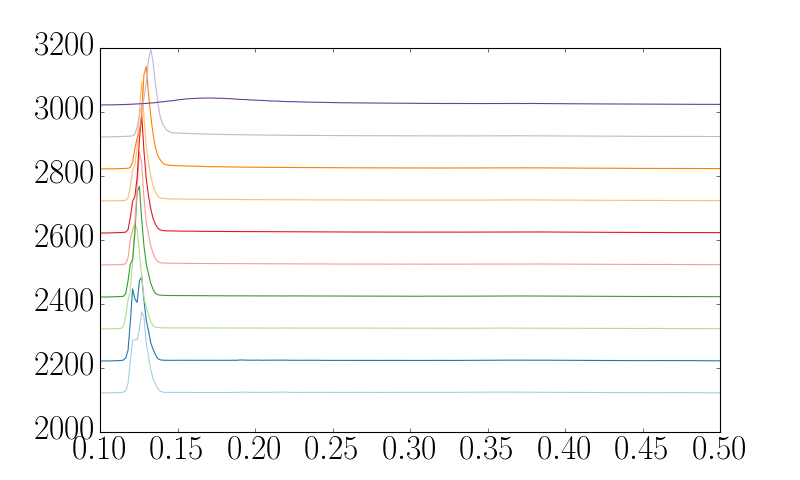

In [236]:
#plt.gca().set_color_cycle([colormap[i] for i in range(0,10)])
fig,ax = plt.subplots()

for index, row in dfsort.iterrows():
    x = row['xRay'][0]
    y = row['xRay'][1]
    baseline, = ax.plot(x,y+i)
    col = baseline.get_color()
    ax.text(x[-20],y[-20]+i,'Temp: {i}'.format(i=row['Temperature']),fontsize=12,color=col)
    #ax.loglog(value[0],value[1],label="T="+T)
    i=i+100
plt.xlim(.1,.5)
#plt.ylim(1,600)
#plt.yticks([])
#ppl.legend(ax)
plt.show()

In [137]:
colors=bmap.mpl_colormap
mpl.rcParams['axes.color_cycle'] = colors


ValueError: <matplotlib.colors.LinearSegmentedColormap object at 0x7f96cede6210> must be of type: string or non-dictionary iterable.

<IPython.core.display.Javascript object>


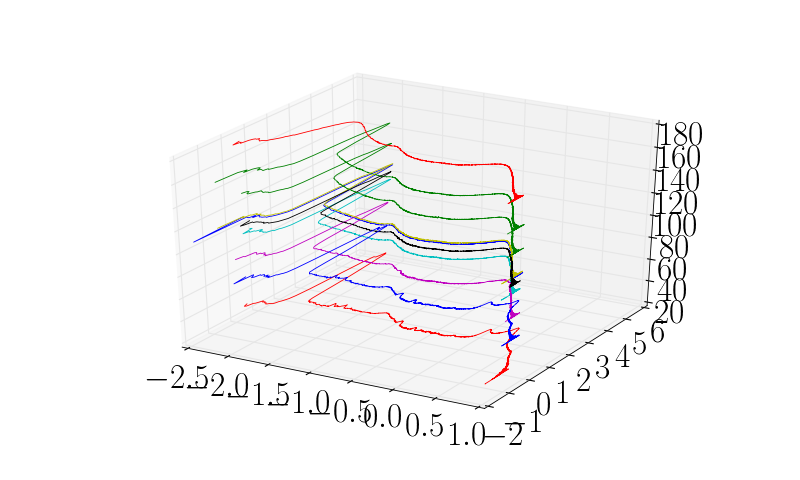

/home/adam/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [88]:
p = re.compile('._(\d*)C')
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
i=0
for key, value in data.iteritems():
    temp= float(p.search(key).group(1))
    #print temp
    #print key
    ppl.plot(ax,np.log(value[0]),np.log(value[1]),temp)
    #ax.xaxis.set_scale('log')
    #ax.yaxis.set_scale('log')
plt.show()


<IPython.core.display.Javascript object>


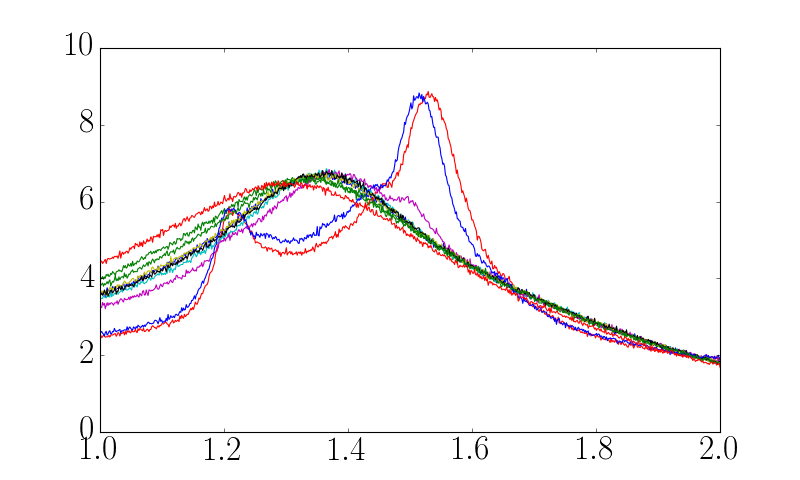

In [41]:
plt.figure()
for key, value in data.iteritems():
    plt.plot(value[0],value[1])
    plt.xlim(1,2)
    plt.ylim(0,10)

In [30]:
t1[0]

array([ 0.08435202,  0.08581901,  0.087286  , ...,  2.5562329 ,
        2.5576999 ,  2.5591669 ])

In [32]:
t1[1]

array([ 2.        ,  1.25      ,  1.45      , ...,  0.80000001,
        0.60000002,  0.        ])

# I read off the first peak in the small angle (should correspond to the smectic layer spacing), and I read it in now.

In [7]:
dspacing = pd.read_csv('./d-spacing-data-from-xray.csv')

In [8]:
dspacing

,T,q,D,delq,delD
0,30,0.128,49.087385,0.003,1.150486
1,55,0.127,49.473900,0.003,1.168675
2,75,0.124,50.670849,0.003,1.225908
3,96,0.125,50.265482,0.003,1.206372
4,103,0.125,50.265482,0.003,1.206372
5,109,0.127,49.473900,0.003,1.168675
6,110,0.127,49.473900,0.003,1.168675
7,130,0.131,47.963247,0.003,1.098395
8,150,0.133,47.241995,0.003,1.065609


In [9]:
#phasesD = pd.Series()
def tchecker(temp):
    t = float(temp)
    if t > 162:
        p = 'Iso'
    elif 162 > t > 111:
        p = r'SmA'
    elif 111 > t > 108:
        p = r"""SmC_AP_A'"""
    elif 108 > t > 80:
        p = r'SmC_AP_A'
    elif 80 > t > 69:
        p = r'SmC_AP_F'
    elif 69 > t:
        p = r'Crystal'
    return str(temp)+': '+p
dspacing['Phases'] = dspacing['T'].apply(tchecker)

In [40]:
dspacing

,T,q,D,delq,delD,Phases
0,30,0.128,49.087385,0.003,1.150486,30: Crystal
1,55,0.127,49.473900,0.003,1.168675,55: Crystal
2,75,0.124,50.670849,0.003,1.225908,75: SmC_AP_F
3,96,0.125,50.265482,0.003,1.206372,96: SmC_AP_A
4,103,0.125,50.265482,0.003,1.206372,103: SmC_AP_A
5,109,0.127,49.473900,0.003,1.168675,109: SmC_AP_A'
6,110,0.127,49.473900,0.003,1.168675,110: SmC_AP_A'
7,130,0.131,47.963247,0.003,1.098395,130: SmA
8,150,0.133,47.241995,0.003,1.065609,150: SmA


'SmC_AP_A'

<IPython.core.display.Javascript object>


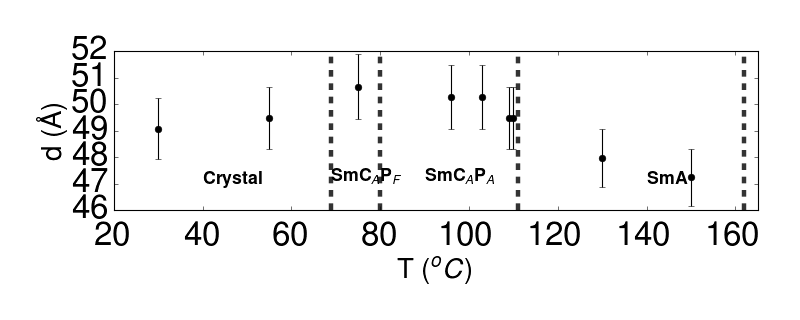

In [22]:
fig,ax2 = plt.subplots(figsize=(10,4))
#ax.grid()
ax2.errorbar(dspacing['T'],dspacing['D'],yerr=dspacing['delD'],fmt='ko')
#for i, txt in enumerate(dspacing['Phases']):
#    ax.annotate(txt, xy=(dspacing['T'].iloc[i],dspacing['D'].iloc[i]),xytext=(dspacing['T'].iloc[i],dspacing['D'].iloc[i]+rand.random()),fontsize=10)
#    print txt, (dspacing['T'].iloc[i],dspacing['D'].iloc[i])
ax2.set_xlim([20,165])
ax2.annotate(r'$\textbf{Crystal}$',(40,47),fontsize=16)
ax2.annotate(r'$\textbf{SmC}_A\textbf{P}_F$', (69,47),fontsize=16)
ax2.annotate(r'$\textbf{SmC}_A\textbf{P}_A$', (90,47),fontsize=16)
#ax.annotate(r'SmC_AP_A', (110,47),fontsize=10)
ax2.annotate(r'$\textbf{SmA}$', (140,47),fontsize=16)

ax2.axvline(162,alpha = .8,linestyle='dashed',color = 'k',lw=4)
ax2.axvline(111,alpha = .8,linestyle='dashed',color = 'k',lw=4)
#ax.axvline(108,alpha = .4,linestyle='dashed',color = 'k')
ax2.axvline(80,alpha = .8,linestyle='dashed',color = 'k',lw=4)
ax2.axvline(69,alpha = .8,linestyle='dashed',color = 'k',lw=4)
ax2.set_xlabel(r'T   $(^o C)$')
ax2.set_ylabel(r'd (\AA)')
ax2.tick_params(axis='x', pad=10)
plt.tight_layout()
plt.show()
plt.savefig('d-spacing.pdf')
#plt.savefig('d-spacing.png')

<IPython.core.display.Javascript object>


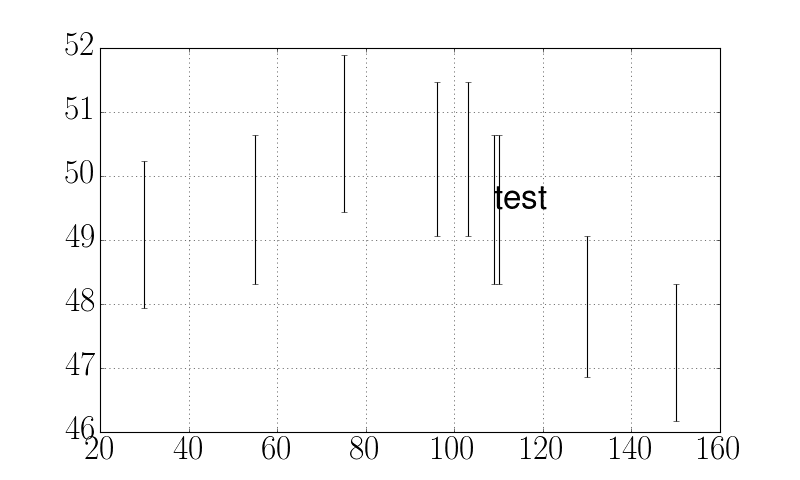

In [56]:
fig, ax = plt.subplots()
ax.grid()
ax.errorbar(dspacing['T'],dspacing['D'],yerr=dspacing['delD'],fmt='k,')
ax.annotate('test', xy=(dspacing['T'].iloc[5],dspacing['D'].iloc[5]))


<IPython.core.display.Javascript object>


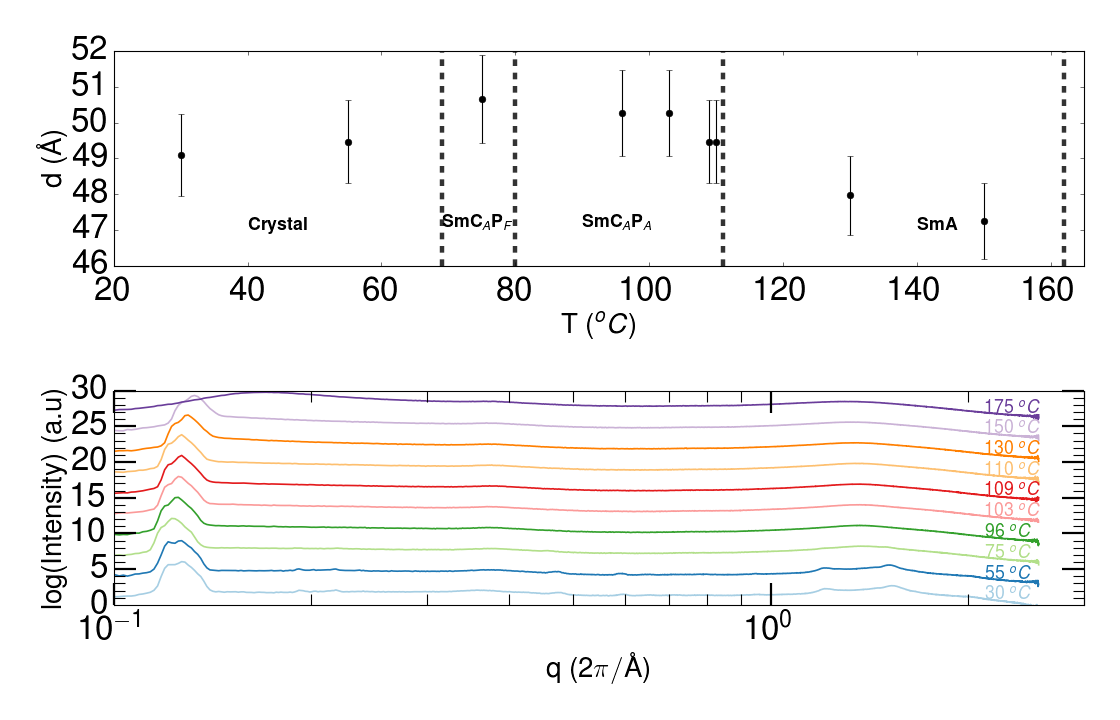

In [47]:
fig2,(ax2,ax1) = plt.subplots(2,figsize=(14,9))
#replot dspacing data
ax2.errorbar(dspacing['T'],dspacing['D'],yerr=dspacing['delD'],fmt='ko')
#for i, txt in enumerate(dspacing['Phases']):
#    ax.annotate(txt, xy=(dspacing['T'].iloc[i],dspacing['D'].iloc[i]),xytext=(dspacing['T'].iloc[i],dspacing['D'].iloc[i]+rand.random()),fontsize=10)
#    print txt, (dspacing['T'].iloc[i],dspacing['D'].iloc[i])
ax2.set_xlim([20,165])
ax2.annotate(r'$\textbf{Crystal}$',(40,47),fontsize=16)
ax2.annotate(r'$\textbf{SmC}_A\textbf{P}_F$', (69,47),fontsize=16)
ax2.annotate(r'$\textbf{SmC}_A\textbf{P}_A$', (90,47),fontsize=16)
#ax.annotate(r'SmC_AP_A', (110,47),fontsize=10)
ax2.annotate(r'$\textbf{SmA}$', (140,47),fontsize=16)

ax2.axvline(162,alpha = .8,linestyle='dashed',color = 'k',lw=4)
ax2.axvline(111,alpha = .8,linestyle='dashed',color = 'k',lw=4)
#ax.axvline(108,alpha = .4,linestyle='dashed',color = 'k')
ax2.axvline(80,alpha = .8,linestyle='dashed',color = 'k',lw=4)
ax2.axvline(69,alpha = .8,linestyle='dashed',color = 'k',lw=4)
ax2.set_xlabel(r'T   $(^o C)$')
ax2.set_ylabel(r'd (\AA)')
ax2.tick_params(axis='x', pad=10)


#replot xray data
bmap = brewer2mpl.get_map('Paired', 'qualitative', 10)
colors = bmap.mpl_colors
i=.5
colormap=bmap.mpl_colors
mpl.rcParams['axes.color_cycle'] = colormap

#plt.gca().set_color_cycle([colormap[i] for i in range(0,10)])
#ax.set_xlim(.1,5)
#ax.set_ylim(-1,23)
for index, row in dfsort.iterrows():
    x = row['xRay'][0]
    y = row['xRay'][1]
    baseline, = ax1.semilogx(x,np.log(y)+i,linewidth=1.5)
    col = baseline.get_color()
    ax1.text(x[-300],np.log(y[-300])+i,r'{i} ^o C'.format(i=int(row['Temperature']),j=row['phase']),fontsize=16,color=col,bbox=dict(facecolor='none',edgecolor='none'),weight ='heavy')
    #ax.loglog(value[0],value[1],label="T="+T)
    i=i+2.9
ax1.set_xlim(.1,3)
ax1.set_ylim(.001,30)
ax1.minorticks_on()
ax1.tick_params('both', length=20, width=2, which='major')
ax1.tick_params('both', length=10, width=1, which='minor')
#plt.yticks([])
#ppl.legend(ax)
ax1.set_xlabel(r'q ($2\pi/${\AA})')
ax1.set_ylabel(r'log(Intensity) (a.u)')
ax1.tick_params(axis='x', pad=10)

plt.tight_layout()
#plt.show()
plt.savefig('d-spacingAndXray.pdf')
